## Lista 4

### Zadanie 1

In [1]:
import math
import scipy.optimize as optimize

TOLERANCE = 1e-8
MAX_ITER = 100

class Stats:
    def __init__(self):
        self.mult_div = 0   # Licznik mnożeń i dzieleń
        self.add_sub = 0    # Licznik dodawań i odejmowań
        self.iterations = 0 # Licznik pętli (ile kroków zrobiła metoda)

    def reset(self):
        """Zeruje liczniki przed uruchomieniem nowej metody."""
        self.mult_div = 0
        self.add_sub = 0
        self.iterations = 0

stats = Stats()


def f(x):
    return math.tan(math.pi - x) - x


def df(x): # liczę pochodną funkcji (potrzebne do metody Newtona)
    t = math.tan(math.pi - x)
    return -2 - t**2

# METODA BISEKCJI
def bisection_manual(a, b): # jej działanie polega na sprawdzeniu w połowie, gdzie dany argument się znajduje czy jest wcześniej czy później i wyrzucenu niepotrzebnej połowy
    stats.reset()
    # Sprawdzenie wstępne: czy w ogóle w tym przedziale jest miejsce zerowe?
    # Funkcja musi mieć różne znaki na krańcach
    if f(a) * f(b) >= 0:
        return None
    
    c = a
    for i in range(MAX_ITER):
        stats.iterations += 1
        
        # KROK KLUCZOWY: Wyznaczamy środek przedziału (c)
        c = (a + b) / 2.0
        stats.add_sub += 1   # zliczamy dodawanie 
        stats.mult_div += 1  # zliczamy dzielenie 
        
        fc = f(c)
        # Sprawdzamy czy trafiliśmy idealnie (lub wystarczająco blisko) w zero
        if abs(fc) < TOLERANCE:
            break
            
        # Jeśli f(a) i f(c) mają różne znaki, to pierwiastek jest między a i c.
        stats.mult_div += 1 # koszt mnożenia przy sprawdzaniu znaku
        if f(a) * fc < 0:
            b = c # Przesuwamy prawą granicę do środka
        else:
            a = c # Przesuwamy lewą granicę do środka
            
    return c

# METODA NEWTONA 
def newton_manual(x0):
    stats.reset()
    x = x0
    for i in range(MAX_ITER):
        stats.iterations += 1
        fx = f(x)
        dfx = df(x) # Tu musimy obliczyć też pochodną
        
        # Czy wynik jest już bliski zera?
        if abs(fx) < TOLERANCE:
            break
            
        # KROK KLUCZOWY: Wzór Newtona: x_nowy = x_stary - f(x)/f'(x)
        x = x - fx / dfx
        stats.add_sub += 1  # odejmowanie
        stats.mult_div += 1 # dzielenie
        
    return x

# METODA SIECZNYCH
# Podobna do Newtona, ale zamiast idealnej stycznej (z pochodnej), robimy linię przecinającą wykres w dwóch punktach (x0 i x1).
def secant_manual(x0, x1):
    stats.reset()
    for i in range(MAX_ITER):
        stats.iterations += 1
        f0 = f(x0)
        f1 = f(x1)
        
        if abs(f1) < TOLERANCE:
            x0 = x1
            break
            
        denom = f1 - f0
        stats.add_sub += 1
        
        # Zabezpieczenie przed dzieleniem przez zero
        if denom == 0:
            break
            
        # KROK KLUCZOWY: Wzór siecznych
        # To przybliżenie wzoru Newtona bez użycia pochodnej.
        x_temp = x1 - f1 * (x1 - x0) / denom
        stats.add_sub += 2  # dwa odejmowania
        stats.mult_div += 2 # mnożenie i dzielenie
        
        # Przesuwamy punkty: stary x1 staje się nowym x0
        x0 = x1
        x1 = x_temp
        
    return x1

# METODA BRENTA
# To metoda hybrydowa. Próbuje być szybka jak Sieczne, ale jak ma kłopoty, to wraca do bezpiecznej Bisekcji.
def brent_manual(a, b):
    stats.reset()
    fa = f(a)
    fb = f(b)
    
    if fa * fb >= 0: return None
    
    # Upewniamy się, że w punkcie 'b' mamy mniejszą wartość (tam szukamy wyniku)
    if abs(fa) < abs(fb):
        a, b = b, a
        fa, fb = fb, fa
        
    c = a
    fc = fa
    
    for i in range(MAX_ITER):
        stats.iterations += 1
        # Sprawdzamy czy wynik jest wystarczająco dokładny LUB przedział jest mikroskopijny
        if abs(fb) < TOLERANCE or abs(b - a) < TOLERANCE:
            return b 
        if fa != fc and fb != fc:
            s = b - fb * (b - a) / (fb - fa)
            stats.add_sub += 2
            stats.mult_div += 2
        else:
            s = b - fb * (b - a) / (fb - fa)
            stats.add_sub += 2
            stats.mult_div += 2
        if not ((s > b and s < (3*a+b)/4) or (s < b and s > (3*a+b)/4)):
            s = (a + b) / 2     # Ratunek: Bisekcja
            stats.add_sub += 1
            stats.mult_div += 1
            
        fs = f(s)
        c = b
        fc = fb
        
        # Aktualizacja przedziału (jak w bisekcji)
        if fa * fs < 0:
            b = s
            fb = fs
        else:
            a = s
            fa = fs
            
        # Zawsze trzymamy lepszy wynik w zmiennej 'b'
        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa
            
    return b

a_start, b_start = 2.0, 3.0 # Przedział poszukiwań, taki ponieważ funckja na końcu przedziału musi mieć różne znaki
x0_start = 2.5              # Punkt startowy

print(f"{'Metoda':<15} | {'x':<10} | {'f(x)':<10} | {'Iteracje':<8} | {'Mnoż/Dod'}")
print("-" * 65)

for nazwa, funkcja, args in [
    ("Bisekcja", bisection_manual, (a_start, b_start)),
    ("m. Brenta", brent_manual, (a_start, b_start)),
    ("m. Siecznych", secant_manual, (a_start, b_start)),
    ("m. Newtona", newton_manual, (x0_start,))
]:
    if nazwa == "m. Newtona":
        res = funkcja(args[0])
    else:
        res = funkcja(args[0], args[1])
        
    ops = stats.mult_div + stats.add_sub
    print(f"{nazwa:<15} | {res:.6f} | {f(res):.1e} | {stats.iterations:<8} | {ops}")

print("\nScipy (dla porównania)")
print(f"Bisekcja: {optimize.bisect(f, a_start, b_start):.6f}")
print(f"Brent:    {optimize.brentq(f, a_start, b_start):.6f}")
print(f"Newton:   {optimize.newton(f, x0_start, fprime=df):.6f}")

Metoda          | x          | f(x)       | Iteracje | Mnoż/Dod
-----------------------------------------------------------------
Bisekcja        | 2.028758 | 8.8e-09 | 28       | 83
m. Brenta       | 2.028758 | -2.8e-09 | 8        | 28
m. Siecznych    | 2.028758 | -3.5e-10 | 7        | 30
m. Newtona      | 2.028758 | 1.1e-12 | 7        | 12

Scipy (dla porównania)
Bisekcja: 2.028758
Brent:    2.028758
Newton:   2.028758


### Wnioski:
- Metoda Bisekcji jest powolna (dużo iteracji i działań mnożenia oraz dzielenia), ale gwarantuje poprawny wynik.
- Metoda Newtona jest bardzo szybka (ma mało iteracji), ale wymaga liczenia pochodnej co często może byc trudne a czasem nawet nie możliwe
- Metoda Siecznych "udaje" metodę Newtona ale nie potrafi liczyć pochodnych. Zamiast stycznej w jednym punkcjie bierze dwa punkty i łączy je sieczną i sprawdza, gdzie ta linia przecina zero.
- Metoda Brenta w założeniu jest szybka, ale gdy widzi, że coś idzie nie tak przełącza się na metode bisekcji, by bezpiecznie wszytsko doliczyć.


### Zadanie 2

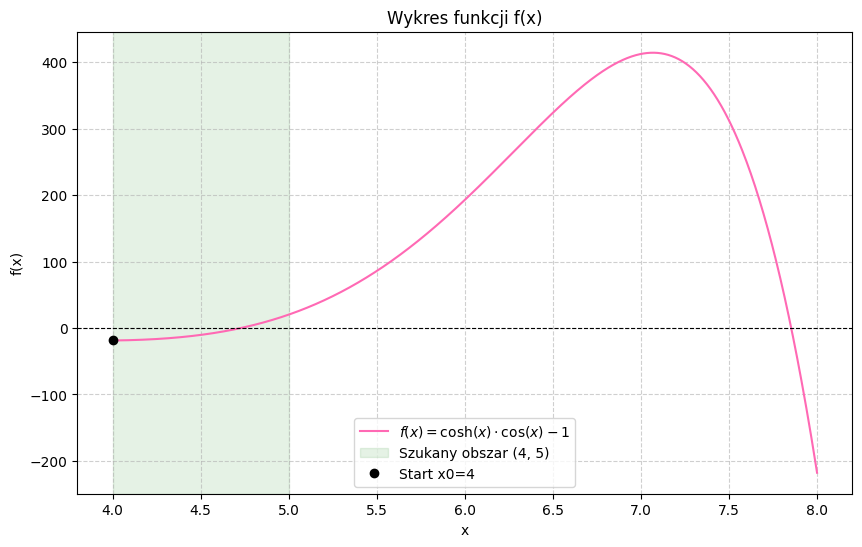

Standardowy Newton (x0=4):
  Wynik: 10.995608

Biblioteka scipy.fsolve (x0=4):
  Wynik: 4.730041

Modyfikowany Newton (x0=4):
  Wynik: 4.730041


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

f2 = lambda x: np.cosh(x) * np.cos(x) - 1

# Pierwsza pochodna f'(x) - potrzebna do metody Newtona (wyznacza nachylenie stycznej).
f2_prime = lambda x: np.cos(x) * np.sinh(x) - np.sin(x) * np.cosh(x)

# Druga pochodna f''(x) - potrzebna do metody modyfikowanej.
# Mówi nam o "krzywiźnie" funkcji (czy jest wklęsła czy wypukła).
f2_bis = lambda x: -2 * np.sin(x) * np.sinh(x) 

xs = np.linspace(4, 8, 1000)
plt.figure(figsize=(10, 6))
plt.plot(xs, f2(xs), label=r"$f(x) = \cosh(x) \cdot \cos(x) - 1$", color="hotpink")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') # Oś X (poziom zero)

plt.axvspan(4, 5, color='green', alpha=0.1, label='Szukany obszar (4, 5)')
plt.plot(4, f2(4), 'ko', label='Start x0=4')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Standardowa Metoda Newtona
# Korzysta tylko z f(x) i f'(x). Zakłada, że funkcja jest w miarę liniowa.
def newton_standard(f, df, x0, max_iter=100, tol=1e-8):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        # Sprawdzenie warunku stopu (czy jesteśmy wystarczająco blisko zera)
        if abs(fx) < tol:
            return x
        
        dfx = df(x)
        if dfx == 0: break # Zabezpieczenie przed dzieleniem przez zero
        
        # Klasyczny wzór Newtona: x_nowy = x_stary - f(x)/f'(x)
        x = x - fx / dfx
    return x

# Moja metoda - wariant metody Laguerre'a/Halley'a
# Korzysta z f(x), f'(x) ORAZ f''(x). Uwzględnia zakrzywienie funkcji.
def iteracyjny_newton_modyfikowany(f, f_prime, f_bis, x_0, max_i_num, tol=1e-8):
    x = x_0 
    for i in range(max_i_num):
        fx = f(x)
        if abs(fx) < tol: # Warunek stopu
            return x
        
        fpx = f_prime(x) # Pierwsza pochodna
        fbx = f_bis(x)   # Druga pochodna

        if fpx == 0: return None 

        # Obliczamy parametry pomocnicze uwzględniające drugą pochodną
        # To pozwala algorytmowi "widzieć", że funkcja zawraca (jest wklęsła/wypukła)
        t = (fx * fbx) / (fpx**2)
        
        root_term = 1 - 2 * t
        # Zabezpieczenie matematyczne (pierwiastek z liczby ujemnej)
        if root_term < 0:
            print(f"Uwaga: W iteracji {i} wyrażenie pod pierwiastkiem ujemne.")
            return x

        # Mianownik jest modyfikowany przez pierwiastek, co "hamuje" lub "przyspiesza" krok
        denominator = 1 + np.sqrt(root_term)
        
        u = fx / fpx
        # Zmodyfikowany wzór aktualizacji x
        x -= u * (2 / denominator)
        
    return x 


# Test 1: Standardowy Newton
x_std = newton_standard(f2, f2_prime, 4.0)
print(f"Standardowy Newton (x0=4):\n  Wynik: {x_std:.6f}")

# Test 2: Funkcja biblioteczna (referencja)
x_scipy = fsolve(f2, 4.0)
print(f"\nBiblioteka scipy.fsolve (x0=4):\n  Wynik: {x_scipy[0]:.6f}")

# Test 3: Moja metoda modyfikowana
# Powinna poradzić sobie z trudnym punktem startowym
x_mod = iteracyjny_newton_modyfikowany(f2, f2_prime, f2_bis, 4.0, 1000)
print(f"\nModyfikowany Newton (x0=4):\n  Wynik: {x_mod:.6f}")

### Zadanie 3

In [43]:
import numpy as np

def bisection(f, a, b, tol=1e-10, max_iter=10_000):
    fa, fb = f(a), f(b)
    if fa * fb >= 0:
        raise ValueError("f(a) i f(b) muszą mieć przeciwne znaki.")

    it = 0
    while (b - a) / 2 > tol and it < max_iter:
        it += 1
        m = (a + b) / 2
        fm = f(m)

        if abs(fm) < tol:
            break

        if fa * fm > 0:
            a, fa = m, fm
        else:
            b, fb = m, fm

    return (a + b) / 2, it #it - liczba iteracji 


Własna bisekcja:
  t = 70.877972268055 s
  iteracje = 39
  v(t) ≈ 335.000000 m/s

scipy bisect:
  t = 70.877972268055 s
  iteracje = 40
  v(t) ≈ 335.000000 m/s
  converged = True


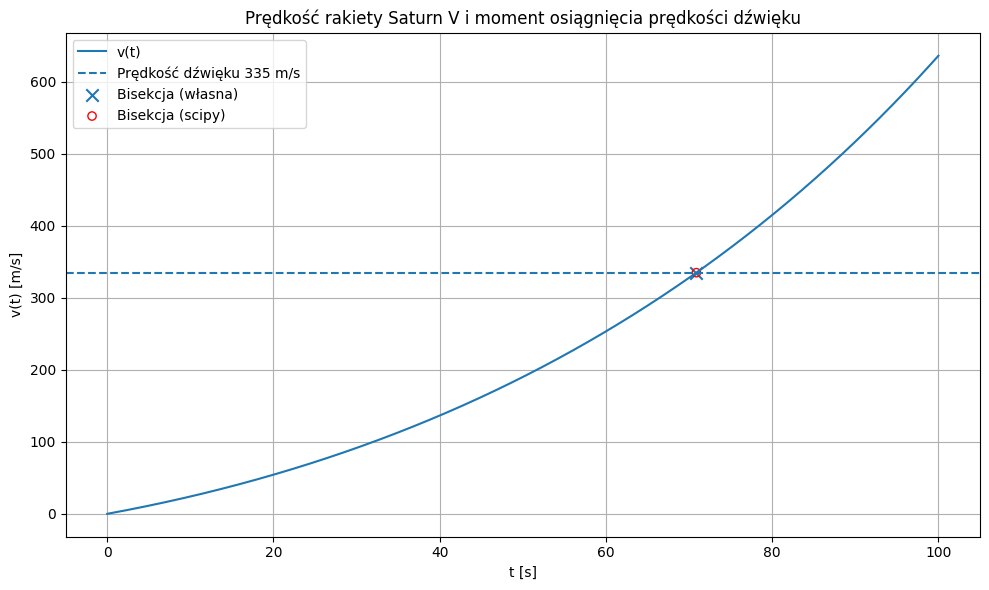

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Dane
u = 2510.0
M0 = 2.8e6
m_dot = 13.3e3
g = 9.81
c_sound = 335.0

def v(t):
    return u * np.log(M0 / (M0 - m_dot * t)) - g * t

# Równanie do rozwiązania: v(t) - 335 = 0
f = lambda t: v(t) - c_sound


t_own, it_own = bisection(f, 1.0, 100.0)


sol = root_scalar(f, bracket=(1.0, 100.0), method='bisect', xtol=1e-10)
t_scipy = sol.root

print("Własna bisekcja:")
print(f"  t = {t_own:.12f} s")
print(f"  iteracje = {it_own}")
print(f"  v(t) ≈ {v(t_own):.6f} m/s")

print("\nscipy bisect:")
print(f"  t = {t_scipy:.12f} s")
print(f"  iteracje = {sol.iterations}")
print(f"  v(t) ≈ {v(t_scipy):.6f} m/s")
print(f"  converged = {sol.converged}")

# --- Wykres ---
t_vals = np.linspace(0, 100, 2000)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, v(t_vals), label='v(t)')
plt.axhline(c_sound, linestyle='--', label='Prędkość dźwięku 335 m/s')

plt.scatter(t_own, v(t_own), marker='x', s=80, label='Bisekcja (własna)')
plt.scatter(t_scipy, v(t_scipy), marker='o', facecolors='none', edgecolors='r',
            label='Bisekcja (scipy)')

plt.xlabel('t [s]')
plt.ylabel('v(t) [m/s]')
plt.title('Prędkość rakiety Saturn V i moment osiągnięcia prędkości dźwięku')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Zadanie 4

Temperatura, w której wartość funkcji G(T) wynosi -10^5 J, wynosi: 904.942583 K


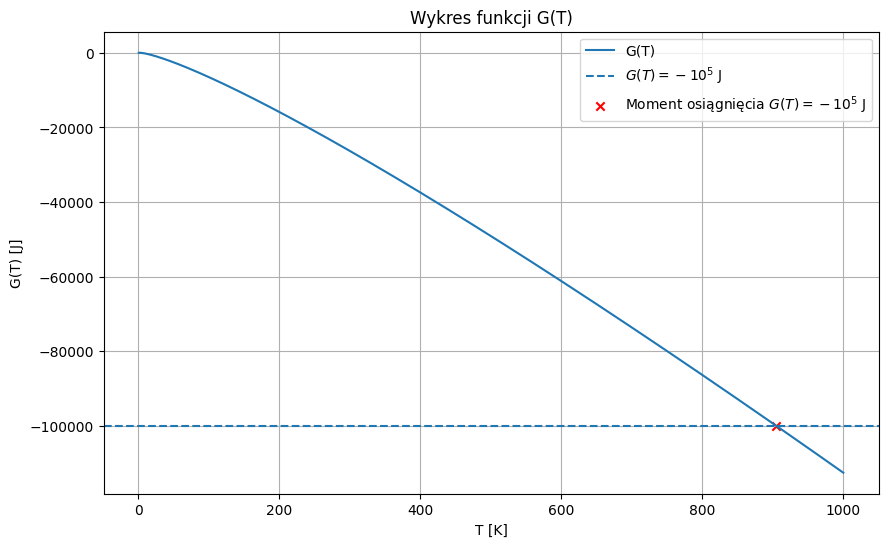

In [45]:
import numpy as np
import matplotlib.pyplot as plt

R = 8.31441
T_0 = 4.44418

T = np.arange(1, 1000, 0.001)


def G(T):
    return -R * T * np.log((T / T_0) ** (5/2))


def F(T):
    return G(T) + 1e5

# Korzystamy z naszej funkcji bisekcji
T_1, it = bisection(F, 100, 1000, 1e-10)

print(f"Temperatura, w której wartość funkcji G(T) wynosi -10^5 J, wynosi: {T_1:.6f} K")

plt.figure(figsize=(10, 6))
plt.plot(T, G(T), label='G(T)')
plt.axhline(-1e5, linestyle='--', label=r'$G(T) = -10^5\ \mathrm{J}$')
plt.scatter(T_1, G(T_1), color='r', marker='x',
            label=r'Moment osiągnięcia $G(T) = -10^5$ J')
plt.xlabel('T [K]')
plt.ylabel('G(T) [J]')
plt.title('Wykres funkcji G(T)')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
sol = root_scalar(F, bracket=(100, 1000), method='bisect', xtol=1e-10)
T_scipy = sol.root
print("\nscipy.optimize.root_scalar (bisect):")
print(f"  T = {T_scipy:.12f} K")



scipy.optimize.root_scalar (bisect):
  T = 904.942583232929 K


### Zadanie 5

In [47]:
import numpy as np
from scipy.optimize import root

def F(vars):
    x, y = vars
    return [
        np.tan(x) - y - 1,
        np.cos(x) - 3*np.sin(y)
    ]

# Różne punkty startowe, aby znaleźć wszystkie rozwiązania
guesses = [(1.4, 0.5), (1.1, 0.7), (1.0, 1.0)]
solutions = []

for g in guesses:
    sol = root(F, g)
    solutions.append(sol.x)

for i, (x, y) in enumerate(solutions, 1):
    print(f"Rozw. {i}: x={x:.6f}, y={y:.6f}")


Rozw. 1: x=0.881593, y=0.213595
Rozw. 2: x=0.881593, y=0.213595
Rozw. 3: x=0.881593, y=0.213595


In [48]:
import numpy as np

# Układ równań
def F(x, y):
    f1 = np.tan(x) - y - 1
    f2 = np.cos(x) - 3*np.sin(y)
    return np.array([f1, f2])

# Jacobian
def J(x, y):
    return np.array([
        [1/np.cos(x)**2, -1],
        [-np.sin(x), -3*np.cos(y)]
    ])

# Metoda Newtona dla układu równań
def newton_system(x0, y0, tol=1e-12, max_iter=50):
    x, y = x0, y0
    for i in range(max_iter):
        f = F(x, y)
        if np.linalg.norm(f) < tol:
            return x, y, i
        
        jac = J(x, y)
        delta = np.linalg.solve(jac, f)
        
        x = x - delta[0]
        y = y - delta[1]
    return x, y, max_iter


In [49]:
guesses = [(1.4, 0.5), (1.1, 0.7), (1.0, 1.0)]
solutions = []

for g in guesses:
    x, y, it = newton_system(*g)
    solutions.append((x, y, it))

for i, (x, y, it) in enumerate(solutions, 1):
    print(f"Rozwiązanie {i}: x = {x:.6f}, y = {y:.6f}, iteracje = {it}")


Rozwiązanie 1: x = 0.881593, y = 0.213595, iteracje = 7
Rozwiązanie 2: x = 0.881593, y = 0.213595, iteracje = 5
Rozwiązanie 3: x = 0.881593, y = 0.213595, iteracje = 5


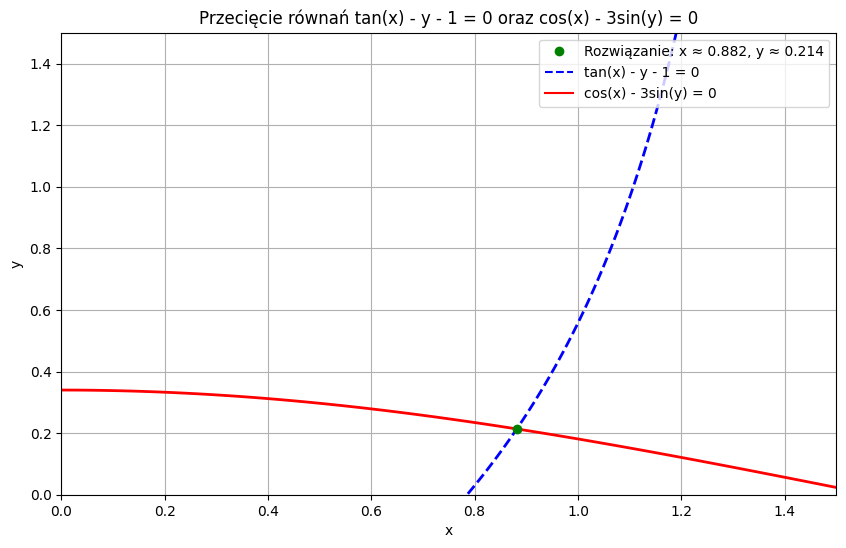

In [50]:
x_vals = np.linspace(0, 1.5, 500)
y_vals = np.linspace(0, 1.5, 500)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)


F1 = np.tan(X_grid) - Y_grid - 1 
F2 = np.cos(X_grid) - 3 * np.sin(Y_grid)


plt.figure(figsize=(10, 6))
contour1 = plt.contour(X_grid, Y_grid, F1, levels=[0], colors='blue', linestyles='--', linewidths=2)
contour2 = plt.contour(X_grid, Y_grid, F2, levels=[0], colors='red', linestyles='-', linewidths=2)
plt.plot(solutions[0][0], solutions[0][1], 'go', label=f'Rozwiązanie: x ≈ {solutions[0][0]:.3f}, y ≈ {solutions[0][1]:.3f}')
plt.plot([], [], 'b--', label='tan(x) - y - 1 = 0')  
plt.plot([], [], 'r-', label='cos(x) - 3sin(y) = 0') 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Przecięcie równań tan(x) - y - 1 = 0 oraz cos(x) - 3sin(y) = 0')
plt.legend()
plt.grid()
plt.show()

### Zadanie 6

In [4]:
import numpy as np
import cmath
import random

# Funkcja obliczająca wartość wielomianu oraz jego 1. i 2. pochodną
# Wykorzystuje uogólniony schemat Hornera
def horner_pochodne(wspolczynniki, x):
    n = len(wspolczynniki) - 1
    val = wspolczynniki[n] # Wartość wielomianu
    d1 = 0.0 + 0.0j        # Pierwsza pochodna
    d2 = 0.0 + 0.0j        # Druga pochodna

    # Iterujemy od najwyższej potęgi w dół, aktualizujemy drugą pochodną, potem pierwszą, a na koniec sam wielomian
    for i in range(1, n + 1):
        d2 = d2 * x + 2.0 * d1
        d1 = d1 * x + val
        val = val * x + wspolczynniki[n - i]
    
    return val, d1, d2

# Główna funkcja znajdująca wszystkie pierwiastki
def znajdz_pierwiastki_laguerre(wspolczynniki_input, tol=1.0e-12):
    
    # Wewnętrzna funkcja szukająca jednego pierwiastka (metoda Laguerre'a)
    def krok_laguerre(obecne_wsp, tol):
        n = len(obecne_wsp) - 1
        # Startujemy z losowego punktu zespolonego 
        x = complex(random.random(), random.random())
        
        for _ in range(50): # Limit iteracji dla bezpieczeństwa
            p, dp, ddp = horner_pochodne(obecne_wsp, x)
            
            if abs(p) < tol: 
                return x
            
            # Wzory pomocnicze metody Laguerre'a, w przeciwieństwie do metody Newtona, która widzi funckje jako prostą, ta wodzi funkcje jako krzywą
            G = dp / p 
            H = G*G - ddp / p # miara krzywizny
            
            # Pierwiastek w mianowniku wzoru
            W = cmath.sqrt((n - 1) * (n * H - G*G)) 

            # Wybieramy mianownik o większym module dla lepszej zbieżności
            if abs(G + W) > abs(G - W):
                mianownik = G + W
            else:
                mianownik = G - W
            
            # Poprawka do x
            a = n / mianownik
            x = x - a
            
            # Jeśli poprawka jest mniejsza od tolerancji, mamy wynik
            if abs(a) < tol:
                return x
                
        return x # Zwracamy najlepsze przybliżenie po wyczerpaniu iteracji

    # Wewnętrzna funkcja obniżająca stopień wielomianu
    def obniz_stopien(wsp, pierwiastek):
        n = len(wsp) - 1
        nowe_wsp = [0j] * n
        nowe_wsp[n-1] = wsp[n]
        
        # Schemat Hornera do dzielenia wielomianu przez (x - pierwiastek)
        for i in range(n-2, -1, -1):
            nowe_wsp[i] = wsp[i+1] + pierwiastek * nowe_wsp[i+1]
        return nowe_wsp

    wspolczynniki = list(wspolczynniki_input)
    n = len(wspolczynniki) - 1
    znalezione_pierwiastki = np.zeros(n, dtype=complex)
    
    for i in range(n):
        root = krok_laguerre(wspolczynniki, tol)
    
        znalezione_pierwiastki[i] = root

        wspolczynniki = obniz_stopien(wspolczynniki, root)
        
    return znalezione_pierwiastki

c = np.array([-84.0, (30.0-14.0j), (5.0j-8.0), (5.0+1.0j), 1.0])


wyniki_moje = znajdz_pierwiastki_laguerre(c)

print("Wyniki metody Laguerre'a:")
for i, x in enumerate(wyniki_moje):
    print(f"x{i+1} = {x:.5f}")

print("Sprawdzenie funkcją wbudowaną np.roots:")

# np.roots oczekuje współczynników od NAJWYŻSZEJ potęgi [a4, a3, ..., a0].
# Moja tablica 'c' jest odwrotna, więc musimy użyć c[::-1].
wyniki_numpy = np.roots(c[::-1])

for i, x in enumerate(wyniki_numpy):
    print(f"ref{i+1} = {x:.5f}")

Wyniki metody Laguerre'a:
x1 = 2.00000-0.00000j
x2 = -0.00000+2.00000j
x3 = -0.00000-3.00000j
x4 = -7.00000+0.00000j
Sprawdzenie funkcją wbudowaną np.roots:
ref1 = -7.00000+0.00000j
ref2 = 0.00000-3.00000j
ref3 = 2.00000+0.00000j
ref4 = 0.00000+2.00000j
